In [1]:
# Import Data Manipulation Libraries

import pandas as pd
import numpy as np\

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warnings

import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries

import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## Step 1:
Import Basic Scikit learn Libraries For Data Manipulation as well as Data Visualization.



## Step 2:
Data Uploading Using Pandas Function

In [2]:
# Load Dataset
url='https://raw.githubusercontent.com/Frisk516/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df=pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
573,316.1,210.7,0.0,185.7,0.0,977.0,689.3,28,38.70
425,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,14,32.90
470,251.4,0.0,118.3,192.9,5.8,1043.6,754.3,100,40.15
539,480.0,0.0,0.0,192.0,0.0,936.2,712.2,90,54.32
286,181.4,0.0,167.0,169.6,7.6,1055.6,777.8,28,27.77
...,...,...,...,...,...,...,...,...,...
719,166.8,250.2,0.0,203.5,0.0,975.6,692.6,90,43.57
256,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,28,31.64
496,387.0,20.0,94.0,157.0,11.6,938.0,845.0,56,61.46
55,198.6,132.4,0.0,192.0,0.0,978.4,825.5,7,14.64


## Step 3:
Performing Exploratory Data Analysis[EDA]:

1.Univariate Analysis

2.BiVariate Analysis

In [3]:
from collections import OrderedDict
stats=[]

for i in df.columns:
    numerical_stats=OrderedDict({
    'Feature':i,
    'Missing Values': df[i].isnull().sum(),
    'Unique Values': df[i].nunique(),
    'Mean': df[i].mean(),
    'Median': df[i].median(),
    'Min': df[i].min(),
    'Max': df[i].max(),
    'Range': df[i].max() - df[i].min(),
    'Standard Deviation': df[i].std(),
    'Variance': df[i].var(),
    'Skewness': df[i].skew(),
    'Kurtosis': df[i].kurt(),
    'Count': df[i].count(),
    'Percentile 25': df[i].quantile(0.25),
    'Percentile 50': df[i].quantile(0.50),
    'Percentile 75': df[i].quantile(0.75),
    'IQR': df[i].quantile(0.75) - df[i].quantile(0.25)
        
})
    stats.append(numerical_stats)

df_stats =pd.DataFrame(stats)

df_stats

           

,Feature,Missing Values,Unique Values,Mean,Median,Min,Max,Range,Standard Deviation,Variance,Skewness,Kurtosis,Count,Percentile 25,Percentile 50,Percentile 75,IQR
0,cement,0,278,281.167864,272.900,102.00,540.0,438.00,104.506364,10921.580220,0.509481,-0.520652,1030,192.375,272.900,350.000,157.625
1,blast_furnace_slag,0,185,73.895825,22.000,0.00,359.4,359.40,86.279342,7444.124812,0.800717,-0.508175,1030,0.000,22.000,142.950,142.950
2,fly_ash,0,156,54.188350,0.000,0.00,200.1,200.10,63.997004,4095.616541,0.537354,-1.328746,1030,0.000,0.000,118.300,118.300
3,water,0,195,181.567282,185.000,121.80,247.0,125.20,21.354219,456.002651,0.074628,0.122082,1030,164.900,185.000,192.000,27.100
4,superplasticizer,0,111,6.204660,6.400,0.00,32.2,32.20,5.973841,35.686781,0.907203,1.411269,1030,0.000,6.400,10.200,10.200
5,coarse_aggregate,0,284,972.918932,968.000,801.00,1145.0,344.00,77.753954,6045.677357,-0.040220,-0.599016,1030,932.000,968.000,1029.400,97.400
6,fine_aggregate,0,302,773.580485,779.500,594.00,992.6,398.60,80.175980,6428.187792,-0.253010,-0.102177,1030,730.950,779.500,824.000,93.050
7,age,0,14,45.662136,28.000,1.00,365.0,364.00,63.169912,3990.437729,3.269177,12.168989,1030,7.000,28.000,56.000,49.000
8,concrete_compressive_strength,0,845,35.817961,34.445,2.33,82.6,80.27,16.705742,279.081814,0.416977,-0.313725,1030,23.710,34.445,46.135,22.425


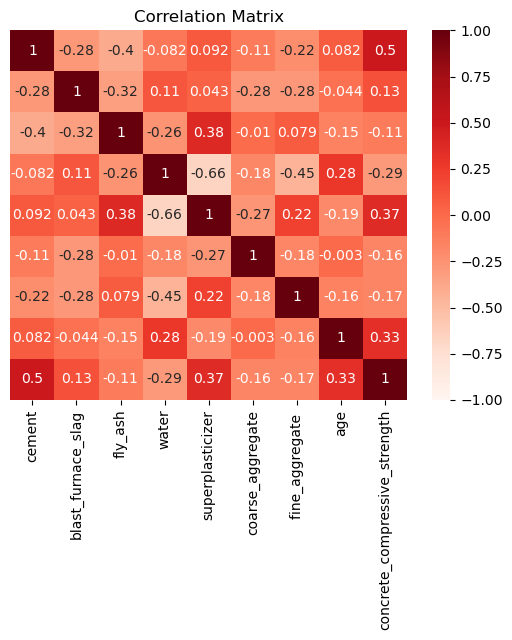

In [4]:
# checking correlation matrix
# X = Independent Variables
# y = Dependent Variable--->['concrete_compressive_strength']

sns.heatmap(df.corr(), annot=True,yticklabels=False,center=0,vmax=1,vmin=-1,cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Understanding Features and Create new Features Based on Existing Features---> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [6]:
df['Composite_Ratio'] = (df['cement']+df['superplasticizer']+df['blast_furnace_slag'])/(df['water']+df['coarse_aggregate'])
df
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                  0.570094
Name: concrete_compressive_strength, dtype: float64

In [7]:
df['Cement_To_Water_Ratio'] = df['cement']/df['water']
df.corr()['concrete_compressive_strength']
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio,Cement_To_Water_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.451331,3.333333
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.445768,3.333333
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.409483,1.458333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.409483,1.458333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.282809,1.034375
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.382300,1.538976
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.328040,1.643878
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.270943,0.770628
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.306471,0.906036


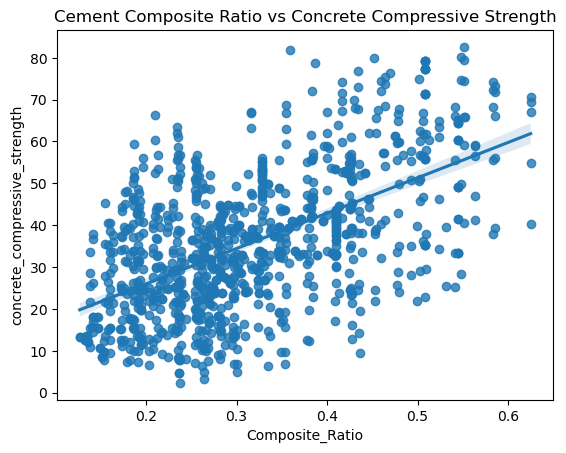

In [8]:
sns.regplot(x = df['Composite_Ratio'],y = df['concrete_compressive_strength'])
plt.title('Cement Composite Ratio vs Concrete Compressive Strength')
plt.show()


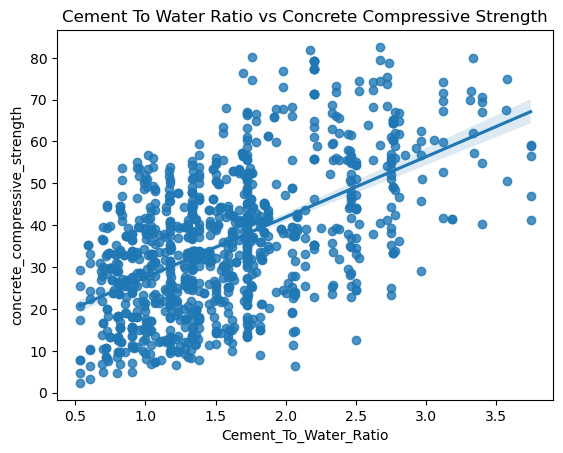

In [9]:
sns.regplot(x = df['Cement_To_Water_Ratio'],y = df['concrete_compressive_strength'])
plt.title('Cement To Water Ratio vs Concrete Compressive Strength')
plt.show()


## Step 4: 

Splitting the dataset into Training and Testing sets and using Train and Test Split to Prevent Data Leakage.

In [12]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='concrete_compressive_strength',axis=1)


y=df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Using Scaling to Normalize the Data

from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()

X_train = mm.fit_transform(X_train)

X_test = mm.transform(X_test)


In [16]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR=r2_score(y_test,y_pred_LR)
r2_score_LR

0.5941574256175657